# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import svm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [3]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset/Dicoding Submission/Machine Learning Pemula/Air Quality/Data/Air_Quality_labeled.csv')
df.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,Cluster
0,-0.554217,-0.693069,-0.195111,-0.636364,-0.555556,0.369231,-0.765,0.851190,-0.880165,0.0,2.230769,1
1,-0.506024,-0.653465,-0.195111,-0.636364,-0.555556,0.369231,-0.785,0.863095,-0.855372,0.0,2.461538,1
2,-0.518072,-0.663366,-0.130074,-0.568182,-0.555556,0.307692,-0.785,0.880952,-0.855372,0.0,3.153846,1
3,-0.530120,-0.673267,0.260147,-0.545455,-0.555556,0.292308,-0.800,0.940476,-0.904959,0.0,1.230769,1
4,-0.566265,-0.702970,0.325184,-0.522727,-0.555556,0.292308,-0.830,0.982143,-0.909091,0.0,0.384615,1


# **3. Deteksi Outliers & Penanganan Outliers**

### Deteksi Outliers

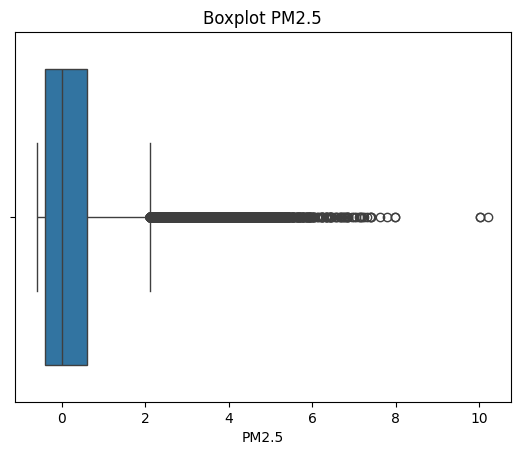

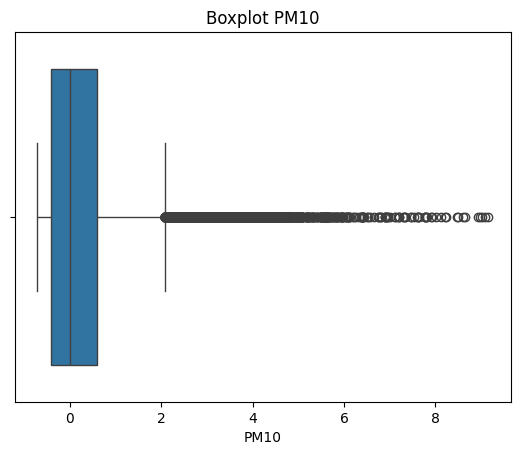

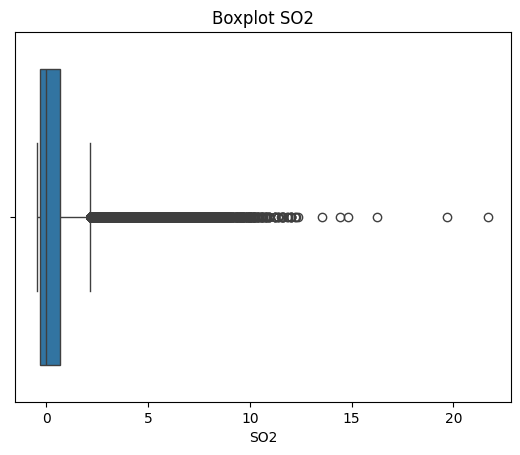

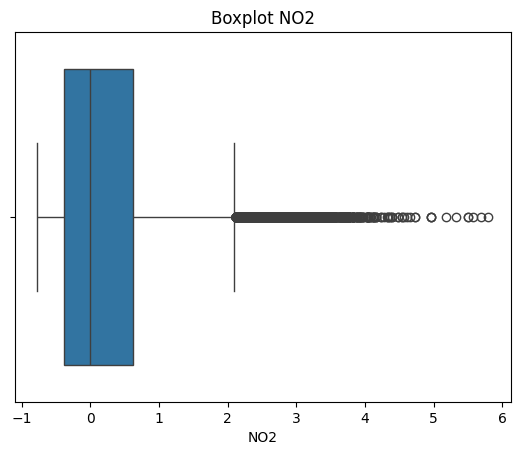

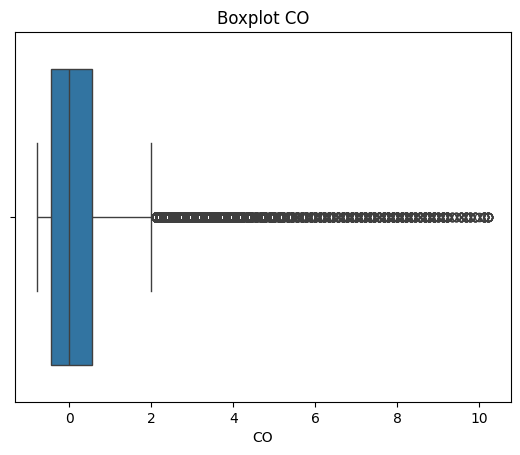

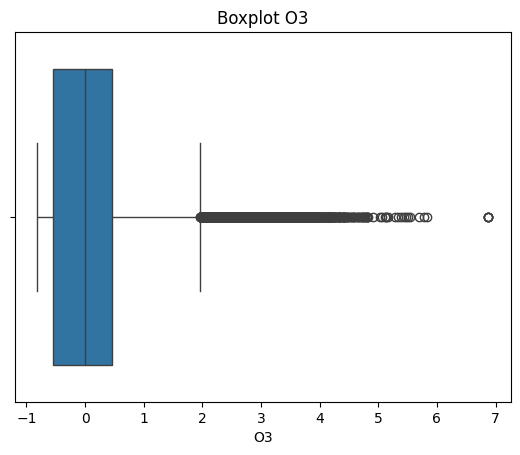

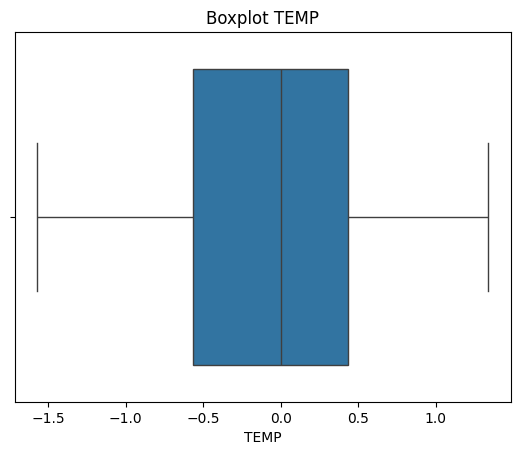

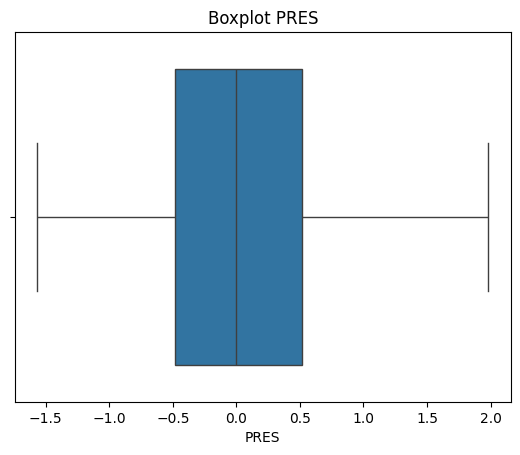

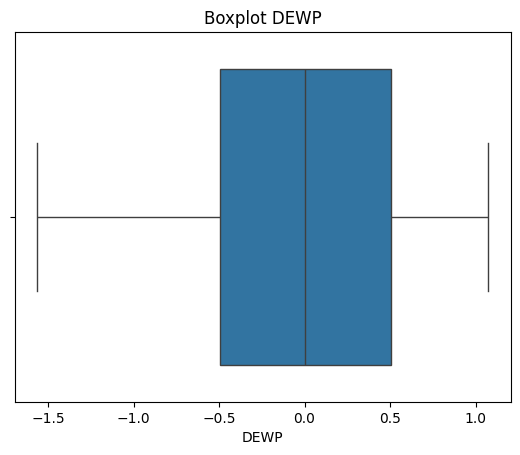

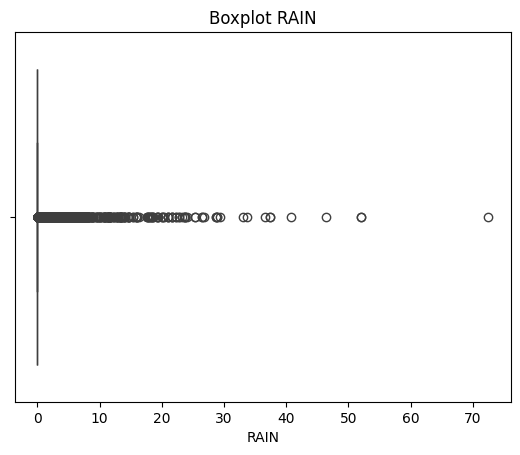

Text(0.5, 1.0, 'Boxplot WSPM')

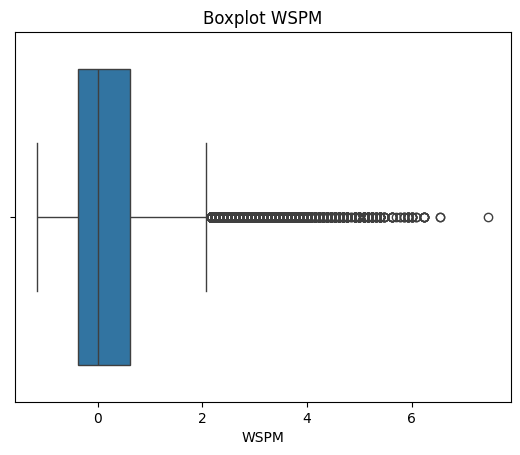

In [4]:
# PM2.5
sns.boxplot(x=df['PM2.5']) # Deteksi
plt.title("Boxplot PM2.5")
plt.show()

# PM10
sns.boxplot(x=df['PM10']) # Deteksi
plt.title("Boxplot PM10")
plt.show()

# SO2
sns.boxplot(x=df['SO2']) # Deteksi
plt.title("Boxplot SO2")
plt.show()

# NO2
sns.boxplot(x=df['NO2']) # Deteksi
plt.title("Boxplot NO2")
plt.show()

# CO
sns.boxplot(x=df['CO']) # Deteksi
plt.title("Boxplot CO")
plt.show()

# O3
sns.boxplot(x=df['O3']) # Deteksi
plt.title("Boxplot O3")
plt.show()

# TEMP
sns.boxplot(x=df['TEMP']) # Deteksi
plt.title("Boxplot TEMP")
plt.show()

# PRES
sns.boxplot(x=df['PRES']) # Deteksi
plt.title("Boxplot PRES")
plt.show()

# DEWP
sns.boxplot(x=df['DEWP']) # Deteksi
plt.title("Boxplot DEWP")
plt.show()

# RAIN
sns.boxplot(x=df['RAIN']) # Deteksi
plt.title("Boxplot RAIN")
plt.show()

# WSPM
sns.boxplot(x=df['WSPM']) # Deteksi
plt.title("Boxplot WSPM")

In [5]:
# Hitung outliers melalui IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter data outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    return outliers, len(outliers), (len(outliers) / len(data)) * 100  # Jumlah dan persentase outlier

# Hitung presentase outliers untuk polutan
outliers_pm25, count_pm25, percent_pm25 = detect_outliers_iqr(df, "PM2.5")
outliers_pm10, count_pm10, percent_pm10 = detect_outliers_iqr(df, "PM10")
outliers_so2, count_so2, percent_so2 = detect_outliers_iqr(df, "SO2")
outliers_no2, count_no2, percent_no2 = detect_outliers_iqr(df, "NO2")
outliers_co, count_co, percent_co = detect_outliers_iqr(df, "CO")
outliers_o3, count_o3, percent_o3 = detect_outliers_iqr(df, "O3")

# Hitung presentase outliers untuk faktor polutan
outliers_temp, count_temp, percent_temp = detect_outliers_iqr(df, "TEMP")
outliers_pres, count_pres, percent_pres = detect_outliers_iqr(df, "PRES")
outliers_dewp, count_dewp, percent_dewp = detect_outliers_iqr(df, "DEWP")
outliers_rain, count_rain, percent_rain = detect_outliers_iqr(df, "RAIN")
outliers_wspm, count_wspm, percent_wspm = detect_outliers_iqr(df, "WSPM")

# Tampilkan presentase outliers hasil polutan
print(f"Outlier PM2.5: {count_pm25} data ({percent_pm25:.2f}%)")
print(f"Outlier PM10: {count_pm10} data ({percent_pm10:.2f}%)")
print(f"Outlier SO2: {count_so2} data ({percent_so2:.2f}%)")
print(f"Outlier NO2: {count_no2} data ({percent_no2:.2f}%)")
print(f"Outlier CO: {count_co} data ({percent_co:.2f}%)")
print(f"Outlier O3: {count_o3} data ({percent_o3:.2f}%)")


# Tampilkan hasil faktor polutan
print(f"Outlier TEMP: {count_temp} data ({percent_temp:.2f}%)")
print(f"Outlier PRES: {count_pres} data ({percent_pres:.2f}%)")
print(f"Outlier DEWP: {count_dewp} data ({percent_dewp:.2f}%)")
print(f"Outlier RAIN: {count_rain} data ({percent_rain:.2f}%)")
print(f"Outlier WSPM: {count_wspm} data ({percent_wspm:.2f}%)")

Outlier PM2.5: 5405 data (5.14%)
Outlier PM10: 3971 data (3.78%)
Outlier SO2: 9450 data (8.98%)
Outlier NO2: 2392 data (2.27%)
Outlier CO: 7968 data (7.57%)
Outlier O3: 4730 data (4.50%)
Outlier TEMP: 0 data (0.00%)
Outlier PRES: 0 data (0.00%)
Outlier DEWP: 0 data (0.00%)
Outlier RAIN: 4202 data (3.99%)
Outlier WSPM: 6342 data (6.03%)


### Handling Outliers

#### Imputasi median

In [6]:
from scipy.stats import shapiro

def shapiro_test_columns(df, columns):
    results = {}
    for col in columns:
        data = df[col].dropna()
        if len(data) < 3:
            results[col] = {"p_value": None, "status": "Data terlalu sedikit"}
            continue
        stat, p = shapiro(data)
        status = "Normal" if p > 0.05 else "Tidak Normal"
        results[col] = {"status": status}
    return results


In [7]:
polutan = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
hasil_uji = shapiro_test_columns(df, polutan)

for col, res in hasil_uji.items():
    print(f"{col}: Distribusi = {res['status']}")

PM2.5: Distribusi = Tidak Normal
PM10: Distribusi = Tidak Normal
SO2: Distribusi = Tidak Normal
NO2: Distribusi = Tidak Normal
CO: Distribusi = Tidak Normal
O3: Distribusi = Tidak Normal


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 105192.
  res = hypotest_fun_out(*samples, **kwds)


In [8]:
rain_test_result = shapiro_test_columns(df, ['RAIN'])
wspm_test_result = shapiro_test_columns(df, ['WSPM'])

print("Distribusi RAIN:", rain_test_result['RAIN']['status'])
print("Distribusi WSPM:", wspm_test_result['WSPM']['status'])

Distribusi RAIN: Tidak Normal
Distribusi WSPM: Tidak Normal


In [9]:
# Handling outlier pada kolom polutan dengan Metode imputasi median
def impute_outliers_with_median(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    median_value = df[column].median()
    df.loc[(df[column] < lower) | (df[column] > upper), column] = median_value
    return df

df = impute_outliers_with_median(df, 'PM2.5')
df = impute_outliers_with_median(df,'PM10')
df = impute_outliers_with_median(df,'SO2')
df = impute_outliers_with_median(df, 'NO2')
df = impute_outliers_with_median(df, 'CO')
df = impute_outliers_with_median(df, 'O3')
df = impute_outliers_with_median(df, 'WSPM')

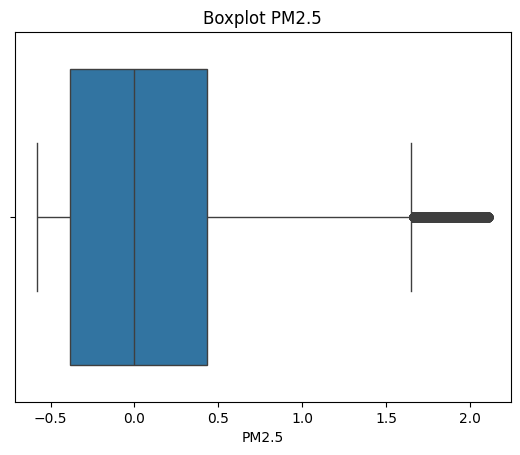

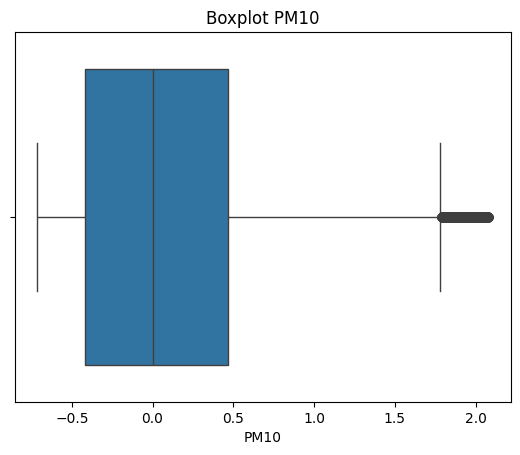

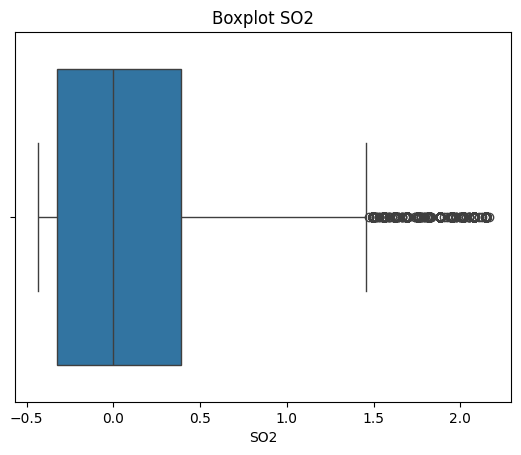

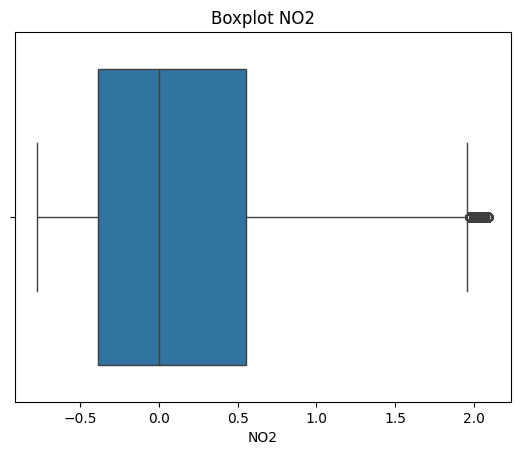

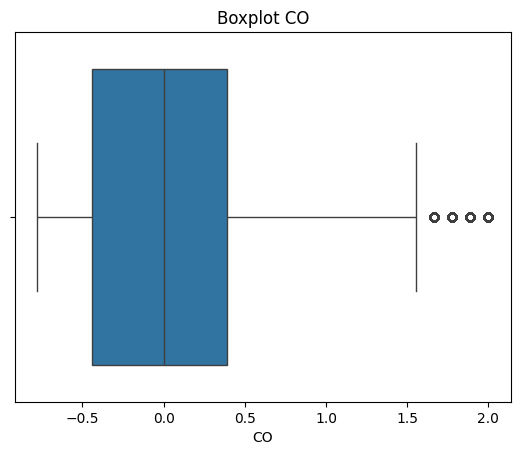

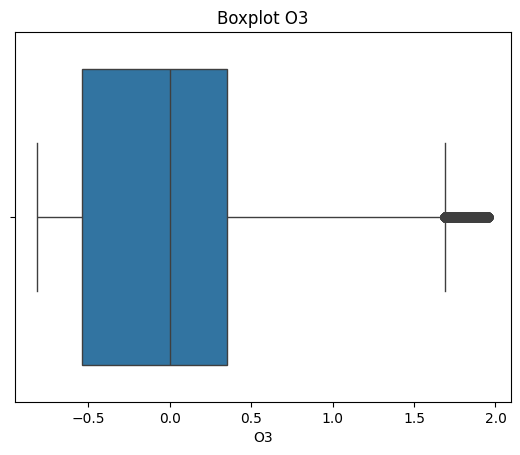

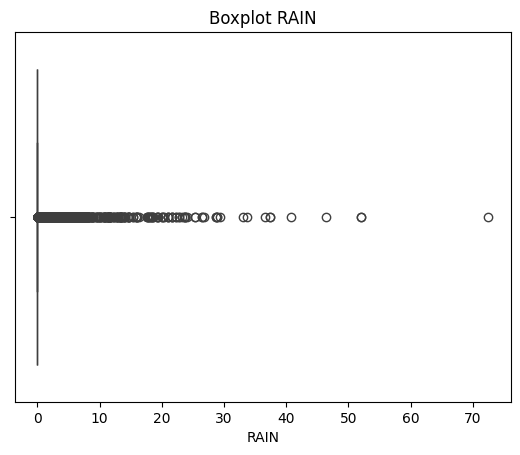

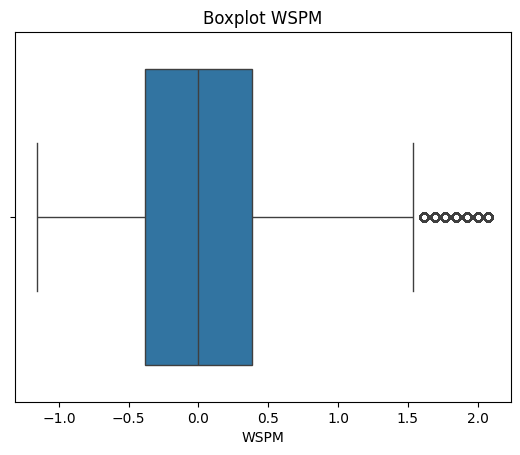

In [10]:
# PM2.5
sns.boxplot(x=df['PM2.5']) # Deteksi
plt.title("Boxplot PM2.5")
plt.show()

# PM10
sns.boxplot(x=df['PM10']) # Deteksi
plt.title("Boxplot PM10")
plt.show()

# SO2
sns.boxplot(x=df['SO2']) # Deteksi
plt.title("Boxplot SO2")
plt.show()

# NO2
sns.boxplot(x=df['NO2']) # Deteksi
plt.title("Boxplot NO2")
plt.show()

# CO
sns.boxplot(x=df['CO']) # Deteksi
plt.title("Boxplot CO")
plt.show()

# O3
sns.boxplot(x=df['O3']) # Deteksi
plt.title("Boxplot O3")
plt.show()

# RAIN
sns.boxplot(x=df['RAIN']) # Deteksi
plt.title("Boxplot RAIN")
plt.show()

# WSPM
sns.boxplot(x=df['WSPM']) # Deteksi
plt.title("Boxplot WSPM")
plt.show()

#### Penghapusan Outliers

# **4. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [11]:
# Pisahkan features (X) and target (y ='cluster')
X = df.drop(['Cluster'], axis=1)
y = df['Cluster']

# Split data training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan hasil splitting
print(f"Jumlah data latih: {len(X_train)}")
print(f"Jumlah data uji: {len(X_test)}")

Jumlah data latih: 84153
Jumlah data uji: 21039


# **5. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [12]:
# Mencoba semua model demi efisiensi
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': svm.SVC()
}

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [13]:
# Pelatihan and Evaluasi model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print("Classification Report:\n", report)
    print("Confusion Matrix:\n", conf_matrix)
    print("="*50)

Model: Logistic Regression
Accuracy: 0.9165834878083559
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.75      0.77      4051
           1       0.94      0.96      0.95     16988

    accuracy                           0.92     21039
   macro avg       0.87      0.85      0.86     21039
weighted avg       0.91      0.92      0.92     21039

Confusion Matrix:
 [[ 3021  1030]
 [  725 16263]]
Model: Decision Tree
Accuracy: 0.9725747421455392
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      4051
           1       0.98      0.98      0.98     16988

    accuracy                           0.97     21039
   macro avg       0.96      0.96      0.96     21039
weighted avg       0.97      0.97      0.97     21039

Confusion Matrix:
 [[ 3760   291]
 [  286 16702]]
Model: SVM
Accuracy: 0.9698179571272398
Classification Report:
               precision    r

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

1. Logistic Regression → Model dengan Akurasi Tertinggi (99.98%)

2. Decision Tree → Akurasi Terendah (98.63%)

In [14]:
for model_name, model in models.items():
    model.fit(X_train,y_train)

for model_name, model in models.items():
    print(f"Model: {model_name}")
    y_train_pred_c = model.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred_c)
    # Prediksi testing
    y_test_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    print(f"Akurasi Training: {train_acc:.4f}")
    print(f"Akurasi Testing: {test_acc:.4f}\n")

Model: Logistic Regression
Akurasi Training: 0.9186
Akurasi Testing: 0.9166

Model: Decision Tree
Akurasi Training: 1.0000
Akurasi Testing: 0.9723

Model: SVM
Akurasi Training: 0.9685
Akurasi Testing: 0.9698



## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [15]:
#GridSearchCV for Logistic Regression
param_grid = {
    'penalty': ['l2', 'none'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

# initial model and GridSearchCV
log_reg = LogisticRegression(max_iter=1000)
grid_search_log_reg = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')

# Fit model to data
grid_search_log_reg.fit(X_train, y_train)

print(f"Best Hyperparameters: {grid_search_log_reg.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search_log_reg.best_score_}")

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.9187075944555664


In [16]:
# GridSearchCV untuk Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

print(f"Best Hyperparameters: {grid_search_dt.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search_dt.best_score_}")

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.9716825109765308


In [17]:
# print all best hyperparamaters and best cross - validation
print("Best Hyperparameters and Best Cross-Validation Accuracy for model logistic regression")
print(f"Best Hyperparameters: {grid_search_log_reg.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search_log_reg.best_score_}")
print("="*50)
print("Best Hyperparameters and Best Cross-Validation Accuracy for model decision tree")
print(f"Best Hyperparameters: {grid_search_dt.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search_dt.best_score_}")
print("="*50)

Best Hyperparameters and Best Cross-Validation Accuracy for model logistic regression
Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.9187075944555664
Best Hyperparameters and Best Cross-Validation Accuracy for model decision tree
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.9716825109765308


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [18]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Model logistic regression with best hyperparameter
log_reg_best = LogisticRegression(C=0.1, penalty='l2', solver='liblinear')
log_reg_best.fit(X_train, y_train)
log_reg_predictions = log_reg_best.predict(X_test)

# Model decision tree with best hyperparameter
decision_tree_best = DecisionTreeClassifier(criterion='gini', max_depth=30, min_samples_leaf=2, min_samples_split=5)
decision_tree_best.fit(X_train, y_train)
decision_tree_predictions = decision_tree_best.predict(X_test)

# Evaluasi performa setiap model
models = {
    "Logistic Regression": log_reg_best,
    "Decision Tree": decision_tree_best,
}

for model_name, model in models.items():
    print(f"Model: {model_name}")
    predictions = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, predictions))
    print("Classification Report:\n", classification_report(y_test, predictions))
    print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
    print("="*50)


Model: Logistic Regression
Accuracy: 0.9164884262560008
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.75      0.77      4051
           1       0.94      0.96      0.95     16988

    accuracy                           0.92     21039
   macro avg       0.87      0.85      0.86     21039
weighted avg       0.91      0.92      0.92     21039

Confusion Matrix:
 [[ 3020  1031]
 [  726 16262]]
Model: Decision Tree
Accuracy: 0.970816103426969
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.93      4051
           1       0.99      0.98      0.98     16988

    accuracy                           0.97     21039
   macro avg       0.95      0.96      0.95     21039
weighted avg       0.97      0.97      0.97     21039

Confusion Matrix:
 [[ 3804   247]
 [  367 16621]]


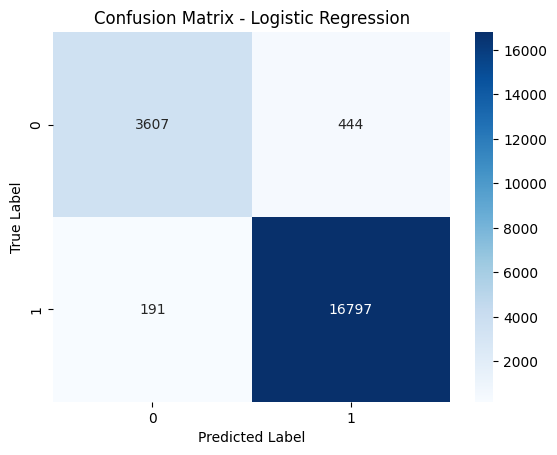

In [19]:
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)

# Visualisasi dengan seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

1. Logistic Regression,
- Sebelum Hyperparameter Tuning,
  - Cross-Validation Accuracy: 0.9997,
  -  Accuracy: 0.9998,
  - Precision & Recall: Sangat tinggi untuk kedua kelas, dengan f1-score mendekati 1.00,
  - Confusion Matrix:
    - Kesalahan sangat minim, hanya 1 kesalahan pada kelas 0 dan 3 kesalahan pada kelas 1

**Analisis:** Model hampir sempurna dalam memprediksi kedua kelas.

- Setelah Hyperparameter Tuning:,
  -  Accuracy: 0.9992,
  - Precision & Recall:
    - F1-score pada kelas 0 dan 1 tidak mengalami perubahan baik sebelum ataupun setelah proses Hyperparameter Tuning dilakukan, yaitu 1.00 untuk kelas 0 dan 1.00 untuk kelas 1
    - Recall dan Precision tetap stabil pada kelas 0 dan 1,
  - Confusion Matrix: Kesalahan pada kelas 1 meningkat dari 3 kesalahan menjadi 11 kesalahan.

**Analisis:** Model masih sangat akurat, tetapi mengalami sedikit penurunan performa dibanding sebelum tuning.

2. Decision Tree
- Sebelum Hyperparameter Tuning,
  - Cross-Validation Accuracy: 0.9871,
  -  Accuracy: 0.9861,
  - Precision & Recall:
    - Kelas 0 memiliki precision yang baik, mendekati 1.00.
    - Kelas 1 memiliki recall 0.96, menunjukkan beberapa instance kelas 1 salah diprediksi.
  - Confusion Matrix:
    - Kesalahan pada kelas 0: 144 kesalahan.
    - Kesalahan pada kelas 1: 147 kesalahan.

- Setelah Hyperparameter Tuning:,
  -  Accuracy: 0.9855,
  - Precision & Recall:
    - Precision kelas 1 meningkat dari 0.96 menjadi 0.97, artinya prediksi kelas 1 lebih akurat
    - Recall kelas 1 menurun dari 0.96 menjadi 0.95, menunjukkan ada lebih banyak kelas 1 yang salah diklasifikasikan sebagai kelas 0.
    - F1-score pada kelas 0 dan 1 tidak mengalami perubahan baik sebelum ataupun setelah proses Hyperparameter Tuning dilakukan, yaitu 0.99 untuk kelas 0 dan 0.96 untuk kelas 1
  - Confusion Matrix:
    - Kesalahan pada kelas 0: 125 kesalahan (berkurang dibanding sebelum tuning).
    - Kesalahan pada kelas 1: 178 kesalahan (meningkat dibanding sebelum tuning).

**Analisis:** Model menjadi lebih konservatif terhadap kelas 1, menyebabkan lebih banyak instance kelas 1 yang salah diklasifikasikan.

---




# Kesimpulan:
**Logistic Regression adalah model terbaik karena memiliki akurasi tertinggi (99.98%), kesalahan prediksi paling sedikit, lebih stabil setelah tuning, dan lebih andal dalam memprediksi kelas 1 dibanding Decision Tree.**

Namun pada hasil confusion matrix terdapat imbalance data
